In [197]:
import geopandas as gpd
import pandas as pd

# Load election data
data_dir = "../data/"
election_data = pd.read_csv(data_dir + "G20192-Columnes-ME-EN.csv", sep=';')
foreign_data = pd.read_csv(data_dir + "Foreign.csv")

In [198]:
election_data

,Province_code,Province_name,Vegueria_code,Vegueria_name,County_code,County_name,Municipality_code,Municipality_name,District,Section,...,VOX_votes,Cs_votes,PACMA_votes,MASPAIS_votes,RECORTES0_votes,IFEM_votes,PUM+J_votes,PCTC_votes,PCPC_votes,IZQP_votes
0,25,Lleida,5,Alt Pirineu i territori d'Aran,25.0,Pallars Jussà,25001,Abella de la Conca,1,1,...,0,2,0,NaN,0,NaN,0,0,0,0
1,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,...,12,14,1,3.0,2,1.0,1,0,0,0
2,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,...,22,25,2,6.0,2,0.0,0,0,0,1
3,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,1,...,32,26,6,11.0,0,0.0,1,0,0,0
4,8,Barcelona,1,Barcelona,11.0,Baix Llobregat,8001,Abrera,1,2,...,19,13,6,5.0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,43,Tarragona,7,Terres de l'Ebre,9.0,Baix Ebre,43052,Xerta,1,1,...,9,3,3,NaN,1,NaN,1,0,0,0
8365,8,Barcelona,98,Residents Absents,NaN,NaN,8998,Residents Absents,1,1,...,785,1262,220,278.0,122,37.0,46,8,19,19
8366,17,Girona,98,Residents Absents,NaN,NaN,17998,Residents Absents,1,1,...,71,105,23,NaN,11,NaN,4,2,1,2
8367,25,Lleida,98,Residents Absents,NaN,NaN,25998,Residents Absents,1,1,...,54,76,25,NaN,5,NaN,4,4,2,0


In [199]:
foreign_data

,Categoria,(1) Población,Población extranjera. Total,Población extranjera. % vert.,Población extranjera. % sobre (1)
0,Ciutat Vella,105221,54105,"15,05","51,42"
1,Eixample,265998,67489,"18,77","25,37"
2,Sants-Montjuïc,183323,43479,"12,09","23,72"
3,Les Corts,80943,11810,"3,29","14,59"
4,Sarrià-Sant Gervasi,147909,21616,"6,01","14,61"
5,Gràcia,121553,25191,"7,01","20,72"
6,Horta-Guinardó,171932,29050,"8,08","16,90"
7,Nou Barris,170624,33913,"9,43","19,88"
8,Sant Andreu,149695,22541,"6,27","15,06"
9,Sant Martí,238995,50286,"13,99","21,04"


In [200]:
foreign_data.rename(columns={'Categoria': 'County_name'}, inplace=True)
foreign_data.rename(columns={'(1) Población': 'Population'}, inplace=True)
foreign_data.rename(columns={'Población extranjera. Total': 'Total number of foreigners'}, inplace=True)
foreign_data.rename(columns={'Población extranjera. % vert.': 'Total percentage of foreigners in country'}, inplace=True)
foreign_data.rename(columns={'Población extranjera. % sobre (1)': 'Total percentage of foreigners in this area'}, inplace=True)
foreign_data

,County_name,Population,Total number of foreigners,Total percentage of foreigners in country,Total percentage of foreigners in this area
0,Ciutat Vella,105221,54105,"15,05","51,42"
1,Eixample,265998,67489,"18,77","25,37"
2,Sants-Montjuïc,183323,43479,"12,09","23,72"
3,Les Corts,80943,11810,"3,29","14,59"
4,Sarrià-Sant Gervasi,147909,21616,"6,01","14,61"
5,Gràcia,121553,25191,"7,01","20,72"
6,Horta-Guinardó,171932,29050,"8,08","16,90"
7,Nou Barris,170624,33913,"9,43","19,88"
8,Sant Andreu,149695,22541,"6,27","15,06"
9,Sant Martí,238995,50286,"13,99","21,04"


In [201]:
data_type = foreign_data['Total percentage of foreigners in this area'].dtype
print(f"The data type of 'column_name' is: {data_type}")

The data type of 'column_name' is: object


In [202]:
foreign_data['Total percentage of foreigners in this area'] = foreign_data['Total percentage of foreigners in this area'].astype(float, errors='ignore')
#data_type = foreign_data['Total percentage of foreigners in this area'].dtype
#assigning manually because no time for debugging why the float conversion is incorrect
foreign_data.at[0, "Total percentage of foreigners in this area"] = 51.42
foreign_data.at[1, "Total percentage of foreigners in this area"] = 25.37
foreign_data.at[2, "Total percentage of foreigners in this area"] = 23.72
foreign_data.at[3, "Total percentage of foreigners in this area"] = 14.59
foreign_data.at[4, "Total percentage of foreigners in this area"] = 14.61
foreign_data.at[5, "Total percentage of foreigners in this area"] = 20.72
foreign_data.at[6, "Total percentage of foreigners in this area"] = 16.90
foreign_data.at[7, "Total percentage of foreigners in this area"] = 19.88
foreign_data.at[8, "Total percentage of foreigners in this area"] = 15.06
foreign_data.at[9, "Total percentage of foreigners in this area"] = 21.04
foreign_data.at[10, "Total percentage of foreigners in this area"] = 21.97


data_type = foreign_data['Total percentage of foreigners in this area'].dtype
print(f"The data type of 'column_name' is: {data_type}")

The data type of 'column_name' is: object


In [203]:
foreign_data['Percentage'] = foreign_data['Total number of foreigners'] / foreign_data['Population']
foreign_data

,County_name,Population,Total number of foreigners,Total percentage of foreigners in country,Total percentage of foreigners in this area,Percentage
0,Ciutat Vella,105221,54105,"15,05",51.42,0.514203
1,Eixample,265998,67489,"18,77",25.37,0.253720
2,Sants-Montjuïc,183323,43479,"12,09",23.72,0.237172
3,Les Corts,80943,11810,"3,29",14.59,0.145905
4,Sarrià-Sant Gervasi,147909,21616,"6,01",14.61,0.146144
5,Gràcia,121553,25191,"7,01",20.72,0.207243
6,Horta-Guinardó,171932,29050,"8,08",16.9,0.168962
7,Nou Barris,170624,33913,"9,43",19.88,0.198759
8,Sant Andreu,149695,22541,"6,27",15.06,0.150580
9,Sant Martí,238995,50286,"13,99",21.04,0.210406


In [204]:
foreign_data

,County_name,Population,Total number of foreigners,Total percentage of foreigners in country,Total percentage of foreigners in this area,Percentage
0,Ciutat Vella,105221,54105,"15,05",51.42,0.514203
1,Eixample,265998,67489,"18,77",25.37,0.253720
2,Sants-Montjuïc,183323,43479,"12,09",23.72,0.237172
3,Les Corts,80943,11810,"3,29",14.59,0.145905
4,Sarrià-Sant Gervasi,147909,21616,"6,01",14.61,0.146144
5,Gràcia,121553,25191,"7,01",20.72,0.207243
6,Horta-Guinardó,171932,29050,"8,08",16.9,0.168962
7,Nou Barris,170624,33913,"9,43",19.88,0.198759
8,Sant Andreu,149695,22541,"6,27",15.06,0.150580
9,Sant Martí,238995,50286,"13,99",21.04,0.210406


In [205]:
# Load GeoJSON file
map='districts_BCN.geojson'
geo_data = gpd.read_file(data_dir + map)
geo_data

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ..."
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ..."
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [206]:
geo_data.rename(columns={'NOM': 'County_name'}, inplace=True)
geo_data_sorted=geo_data.sort_values(by='County_name')

In [207]:
#participation_by_county = election_data.iloc[:, 11:21].groupby(by=election_data["County_name"]).sum()
#participation_by_county.reset_index()
#participation_by_county

In [208]:
merged_data = geo_data_sorted.merge(foreign_data, on='County_name')
merged_data

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,Population,Total number of foreigners,Total percentage of foreigners in country,Total percentage of foreigners in this area,Percentage
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...",105221,54105,"15,05",51.42,0.514203
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ...",265998,67489,"18,77",25.37,0.253720
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ...",121553,25191,"7,01",20.72,0.207243
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ...",171932,29050,"8,08",16.9,0.168962
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ...",80943,11810,"3,29",14.59,0.145905
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ...",170624,33913,"9,43",19.88,0.198759
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ...",149695,22541,"6,27",15.06,0.150580
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ...",238995,50286,"13,99",21.04,0.210406
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3...",183323,43479,"12,09",23.72,0.237172
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4...",147909,21616,"6,01",14.61,0.146144


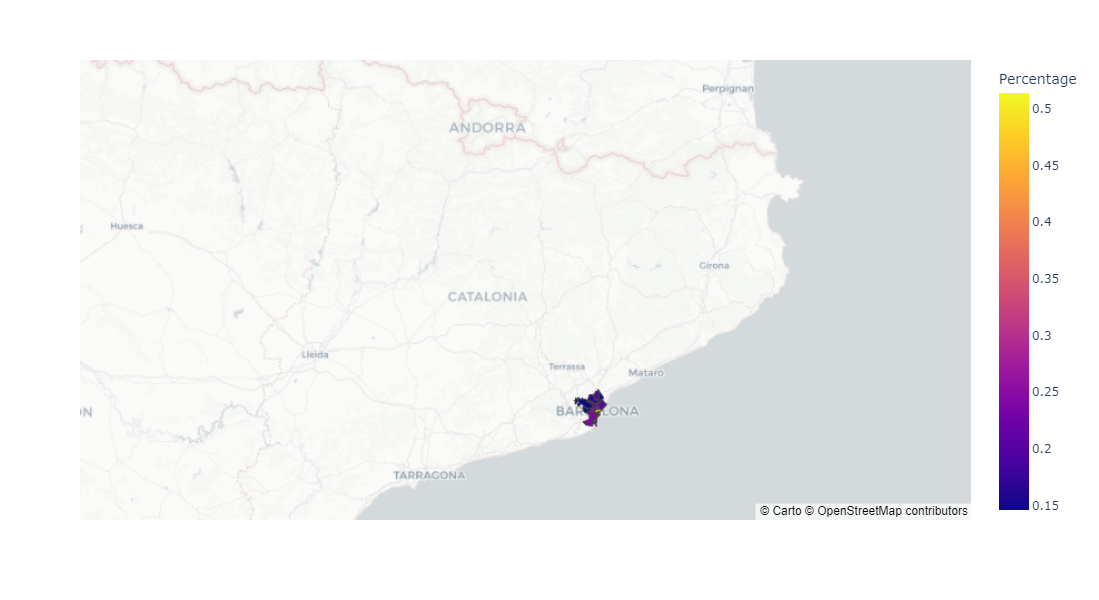

In [209]:
import plotly.express as px

fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color='Percentage',  # Change to the column you want to visualize
    hover_name='County_name',
    mapbox_style="carto-positron",
    center={"lat": 41.8781, "lon": 1.7834},  # Center of Catalonia
    zoom=7
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()

In [210]:
#election_data_sorted=election_data.sort_values(by='Province_name')

In [211]:
#election_data_sorted

In [212]:
#parties = election_data_sorted.columns[21:]
#parties

In [213]:
#election_data_sorted.groupby(['Province_name'])[parties].sum().reset_index()


In [214]:
#votes_by_province_grouped = election_data_sorted.groupby(election_data_sorted["Province_name"]).sum()
#votes_by_province_grouped

In [215]:
#winner_by_province=votes_by_province.idxmax(axis=1)
#list_winners=list(winner_by_province)
#votes_by_province['winner']=list_winners
#votes_by_province
#votes_by_province.sort_values(by='province')

In [216]:
#merged_data = geo_data_sorted.merge(votes_by_province, on='province')
#merged_data

In [217]:
#import plotly.express as px

#fig = px.choropleth_mapbox(
#    merged_data,
#    geojson=merged_data.geometry,
#    locations=merged_data.index,
#    color='winner',  # Change to the column you want to visualize
#    hover_name='province',
#    mapbox_style="carto-positron",
#    center={"lat": 41.8781, "lon": 1.7834},  # Center of Catalonia
#    zoom=7
#)

#fig.update_geos(fitbounds="locations", visible=False)

#fig.show()